In [11]:
steps = ["A","B","C","D","E","F","G","H","I","J"]
print (choice(steps))



H


In [4]:
from random import choice
import numpy as np
import matplotlib.pyplot as plt

DLA_domain = np.zeros((3, 3))

print (DLA_domain)
print ("=====")



DLA_domain[0][0] = 1
print ("Let matrix at the origin become ZERO")
print (DLA_domain)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
=====
Let matrix at the origin become ZERO
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


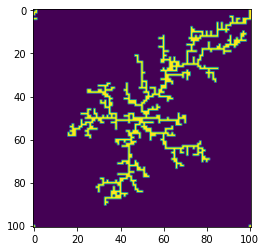

In [7]:
from random import choice
import numpy as np
import matplotlib.pyplot as plt
n_part = 1000 # Number of particles to aggregate
side= 101 # Should be an odd number
steps = [(1,0),(-1,0),(0,1),(0,-1)] # right, left, ......
DLA_domain = np.zeros((side, side))
DLA_domain[side//2][side//2] = 1 # place a seed at center 
for ipart in range(n_part):
    # Start a random walker at origin
    x,y = 0,0
    # perform the random walk until particle aggregates
    dla_swtich = True # True: continue dla process, False: stop
    while dla_swtich: # while condition.
        DLA_domain[x][y] = 0 #Remove particle from current spot
        #=====Randomly move particle
        sx,sy = choice(steps)
        x += sx
        y += sy
        # Enforce periodic boundaries
        if x < 0: x = side - 1 #left wall
        if y < 0: y = side -1 # bottom wall
        if x == side: x = 0 # right wall
        if y == side: y = 0 # top wall
        DLA_domain[x][y] = 1 #Put particle in new location
        # The walker stops when seeing a neighbor
        if (DLA_domain[(x+1)%side][y]+DLA_domain[x][(y+1)%side]
            + DLA_domain[(x+side-1)%side][y]+DLA_domain[x][(y+side-1)%side])>0:
            dla_swtich = False #The walker stops when seeing a neighbor 
plt.imshow(DLA_domain)






In [13]:
import numpy as np
A = np.array([[ 3., -2., 0.,  0.],
              [-2., 4., -2.,  0.],
              [ 0.,  -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])


print (A)


b = np.array([0,2,1,8])

Sol = np.linalg.solve(A,b)
print (Sol)

[[ 3. -2.  0.  0.]
 [-2.  4. -2.  0.]
 [ 0. -2.  6. -4.]
 [ 0.  0. -4.  4.]]
[11.  16.5 21.  23. ]


In [15]:
A_inv = np.linalg.inv(A)
print (A_inv)

Sol2 = np.dot(A_inv, b)
print ("Method 2 =", Sol2)

[[1.   1.   1.   1.  ]
 [1.   1.5  1.5  1.5 ]
 [1.   1.5  2.   2.  ]
 [1.   1.5  2.   2.25]]
Method 2 = [11.  16.5 21.  23. ]
